# Análisis de Datos de FC24

Este análisis de datos en python responde a las siguientes interrogantes:
- ¿Cuáles son los mejores jugadores según su posición?
- ¿Qué equipos tienden a tener jugadores con los mejores puntajes promedio de OVR?
- ¿Cómo varía la característica física (PHY) entre posiciones (defensores, mediocampistas, delanteros)?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('male_players.csv', low_memory=False)

Procedo a dar los primeros vistazos al dataset.

In [5]:
df.head()

,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,1,Kylian Mbappé,91,97,90,80,92,36,78,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,1,2,Rodri,91,66,80,86,84,87,85,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,2,4,Erling Haaland,91,88,92,70,81,45,88,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,3,5,Jude Bellingham,90,80,87,83,88,78,83,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,4,7,Vini Jr.,90,95,84,81,91,29,69,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16161 entries, 0 to 16160
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             16161 non-null  int64  
 1   Rank                   16161 non-null  int64  
 2   Name                   16161 non-null  object 
 3   OVR                    16161 non-null  int64  
 4   PAC                    16161 non-null  int64  
 5   SHO                    16161 non-null  int64  
 6   PAS                    16161 non-null  int64  
 7   DRI                    16161 non-null  int64  
 8   DEF                    16161 non-null  int64  
 9   PHY                    16161 non-null  int64  
 10  Acceleration           16161 non-null  int64  
 11  Sprint Speed           16161 non-null  int64  
 12  Positioning            16161 non-null  object 
 13  Finishing              16161 non-null  object 
 14  Shot Power             16161 non-null  int64  
 15  Lo

In [7]:
df.describe()

,Unnamed: 0,Rank,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Strength,Aggression,Weak foot,Skill moves,Age,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
count,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,...,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000
mean,8080.000000,8934.139657,66.172390,68.149558,54.146835,58.434874,63.599158,50.591981,65.241755,64.778727,...,65.317121,56.342986,2.952045,2.393292,25.790545,65.282489,63.281388,62.361784,63.645925,66.120595
std,4665.423186,5003.925857,6.761979,10.612153,13.740389,9.660646,9.262399,16.323879,9.509657,15.478648,...,12.370667,16.771384,0.677057,0.783739,4.662681,7.351546,7.019344,7.403049,8.026517,7.775521
min,0.000000,1.000000,47.000000,29.000000,20.000000,25.000000,29.000000,15.000000,32.000000,15.000000,...,26.000000,11.000000,1.000000,1.000000,17.000000,45.000000,45.000000,44.000000,41.000000,45.000000
25%,4040.000000,5037.000000,62.000000,62.000000,45.000000,52.000000,58.000000,36.000000,59.000000,57.000000,...,58.000000,46.000000,3.000000,2.000000,22.000000,60.000000,58.000000,57.000000,58.000000,61.000000
50%,8080.000000,9009.000000,66.000000,69.000000,57.000000,59.000000,64.000000,55.000000,66.000000,68.000000,...,66.000000,60.000000,3.000000,2.000000,25.000000,65.000000,63.000000,62.000000,64.000000,66.000000
75%,12120.000000,13135.000000,70.000000,75.000000,64.000000,65.000000,70.000000,64.000000,72.000000,75.000000,...,74.000000,69.000000,3.000000,3.000000,29.000000,70.000000,68.000000,67.000000,69.000000,71.000000
max,16160.000000,17717.000000,91.000000,97.000000,93.000000,94.000000,92.000000,89.000000,91.000000,97.000000,...,95.000000,95.000000,5.000000,5.000000,44.000000,90.000000,90.000000,91.000000,90.000000,91.000000


In [ ]:
Aquí elimino las filas duplicadas y las filas donde todos los campos sean vacíos

In [8]:
df = df.dropna(how='all')

In [9]:
df = df.drop_duplicates()

# ¿Cuáles son los mejores jugadores según su posición?

Aquí lo primero que hago es encontrar los valores únicos del campo 'Position' para ver si los valores no presentan distinción entre mayúsculas y minúsculas, o que hayan distintos valores que representen lo mismo.
Al estar todo en orden, proceso a imprimir los valores para posteriormente hacer un análisis del TOP 5 mejores jugadores según su posición.

In [11]:
po = df.Position.unique()
print(po)

['ST' 'CDM' 'CAM' 'LW' 'CM' 'GK' 'CB' 'RW' 'LB' 'LM' 'RB' 'RM']


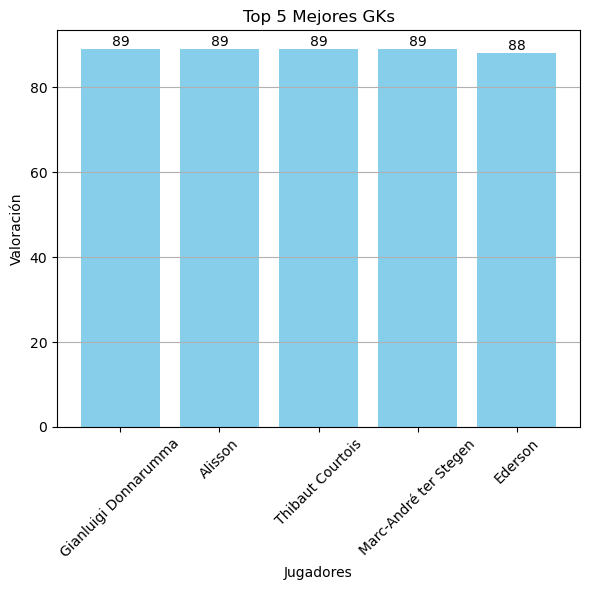

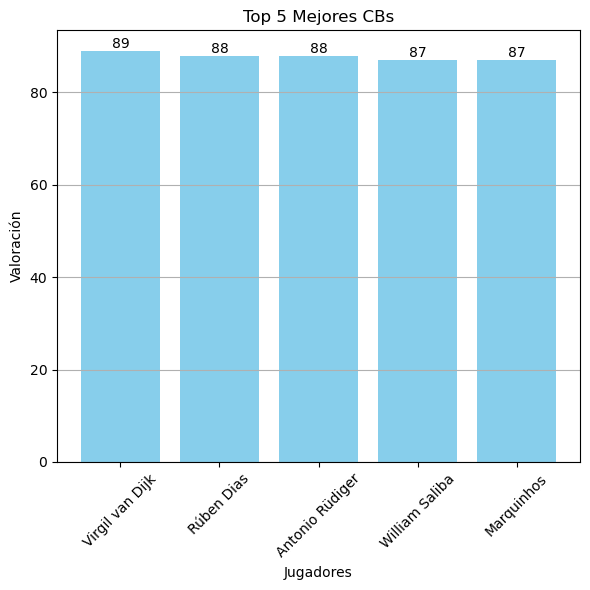

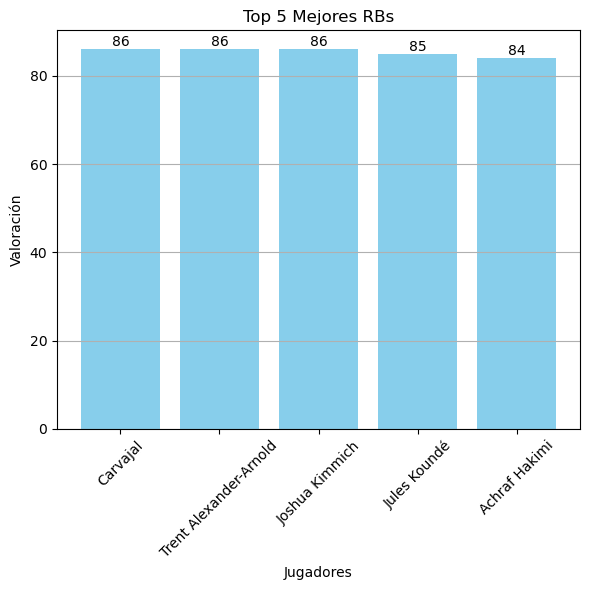

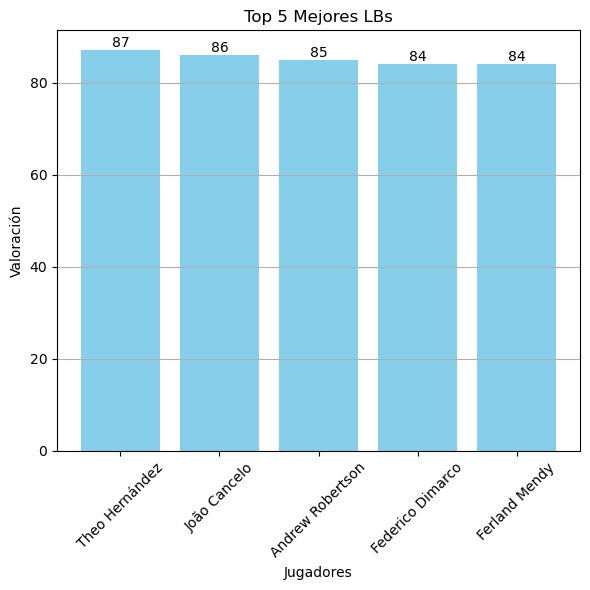

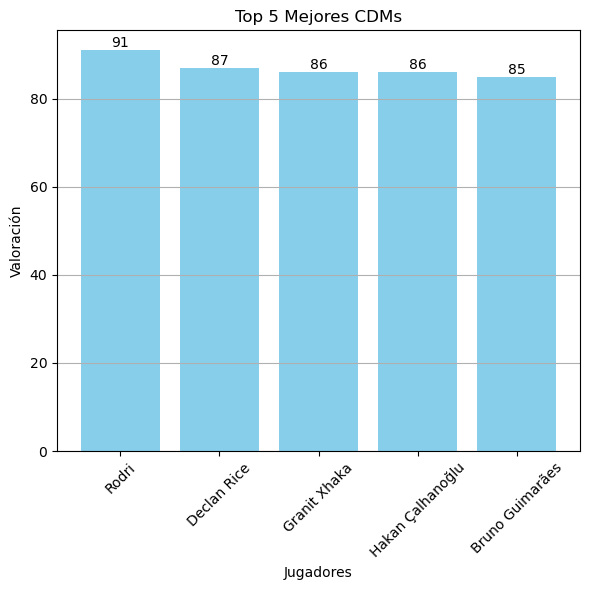

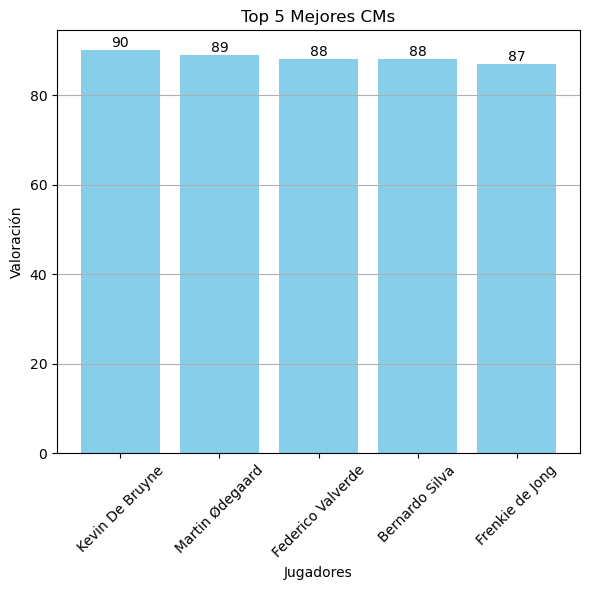

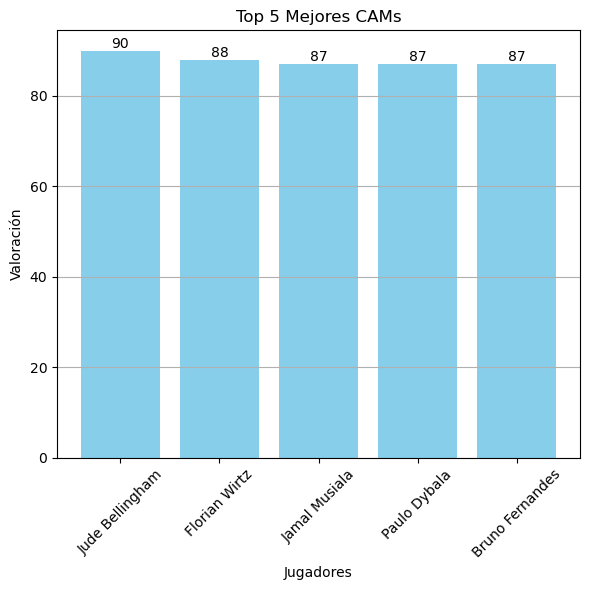

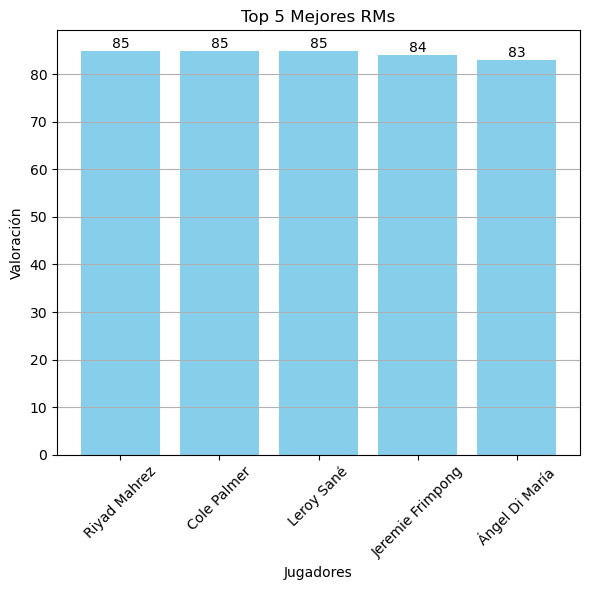

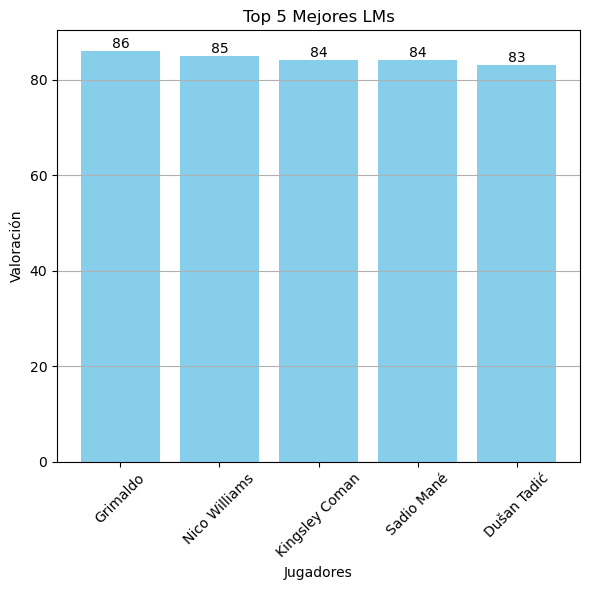

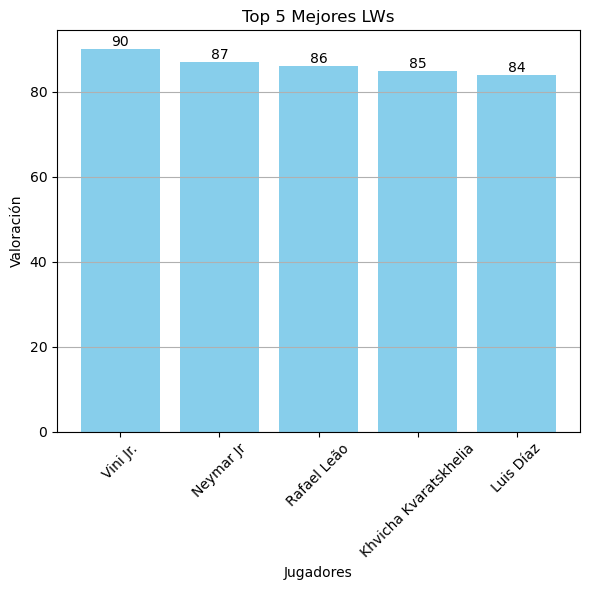

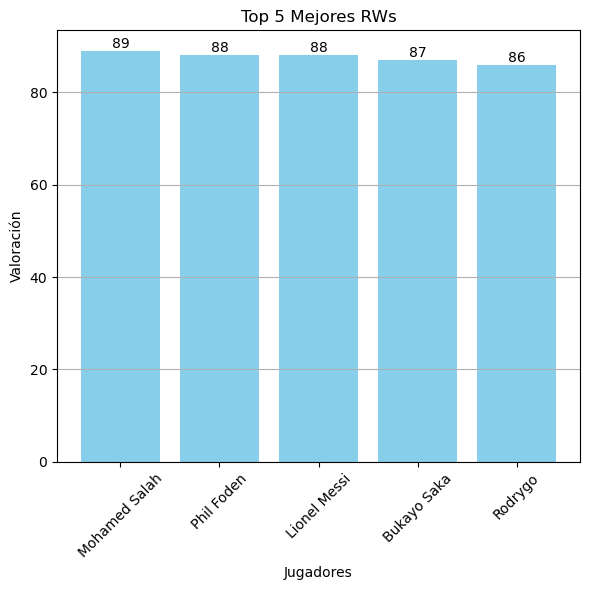

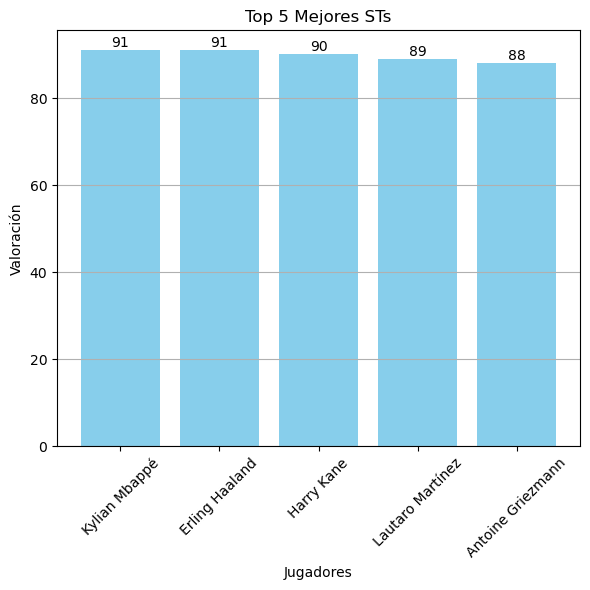

In [32]:
# Defino una función que realice los gráficos de barra correspondientes para cada posición que yo le asigne.

def plot_top_players(df, position, top_n=5):
    # Filtro a los jugadores por posición
    players = df[df['Position'] == position]
    
    # Consigo a los mejores jugadores según el OVR (Valoración)
    top_players = players.nlargest(top_n, 'OVR')
    
    # Gráfico de barras
    plt.figure(figsize=(6, 6)) 
    bars = plt.bar(top_players['Name'], top_players['OVR'], color='skyblue')
    
    plt.title(f'Top {top_n} Mejores {position}s')
    plt.xlabel('Jugadores') 
    plt.ylabel('Valoración')
    plt.grid(axis='y')
    
    # Coloco etiquetas en cada barra 
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')
    
    plt.xticks(rotation=45)
    plt.tight_layout() 
    plt.show()

# Ahora puedo llamar a la función para realizar los gráficos correspondientes.

plot_top_players(df, 'GK', top_n=5) # TOP 5 ARQUEROS
plot_top_players(df, 'CB', top_n=5) # TOP 5 CENTRALES
plot_top_players(df, 'RB', top_n=5) # TOP 5 LATERALES DERECHOS
plot_top_players(df, 'LB', top_n=5) # TOP 5 LATERALES IZQUIERDOS
plot_top_players(df, 'CDM', top_n=5) # TOP 5 MEDIOCAMPISTAS DEFENSIVOS
plot_top_players(df, 'CM', top_n=5) # TOP 5 MEDIOCAMPISTAS
plot_top_players(df, 'CAM', top_n=5) # TOP 5 MEDIOCAMPISTAS OFENSIVOS
plot_top_players(df, 'RM', top_n=5) # TOP 5 MEDIOCAMPISTAS DERECHOS
plot_top_players(df, 'LM', top_n=5) # TOP 5 MEDIOCAMPISTAS IZQUIERDOS
plot_top_players(df, 'LW', top_n=5) # TOP 5 EXTREMOS IZQUIERDOS
plot_top_players(df, 'RW', top_n=5) # TOP 5 EXTREMOS DERECHOS
plot_top_players(df, 'ST', top_n=5) # TOP 5 DELANTEROS

# ¿Qué equipos tienden a tener jugadores con los mejores puntajes promedio de OVR?

Primero voy a revisar los valores únicos de la variable categórica 'Team'.

In [47]:
equipo = df.Team.unique()
equipo

Ahora calculo el valor promedio de OVR en general.

In [67]:
promedio = df.OVR.mean()
promedio

66.17239032238103

Ahora realizo un gráfico de barras horizontales que muestra a simple vista los equipos con mayor promedio de OVR entre
sus jugadores.

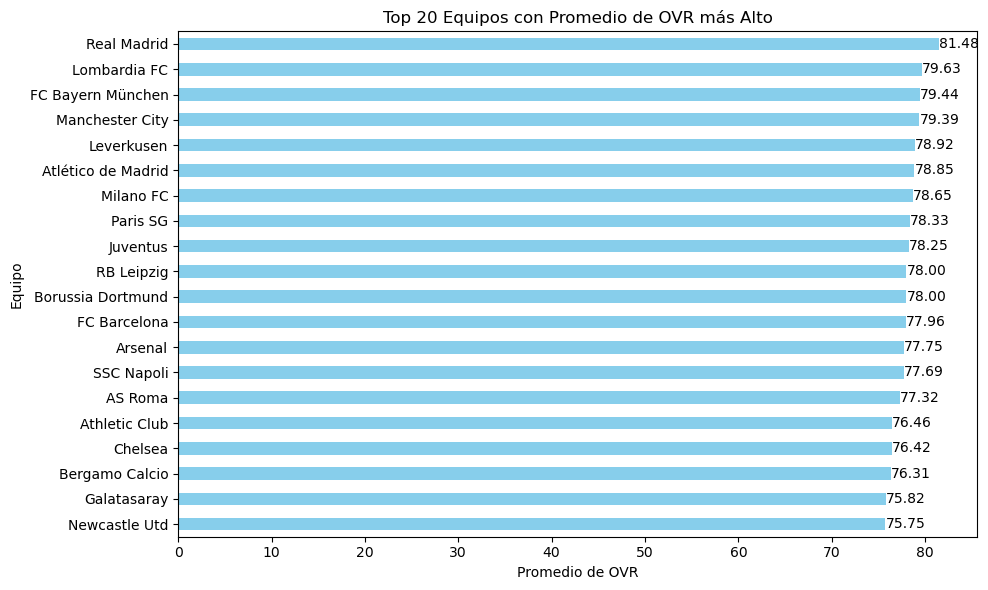

In [107]:
# Agrupo el dataset por equipo y calculo el promedio de OVR
team_avg_ovr = df.groupby('Team')['OVR'].mean().sort_values(ascending=False).head(20)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
bars = team_avg_ovr.plot(kind='barh', color='skyblue')
plt.title('Top 20 Equipos con Promedio de OVR más Alto')
plt.xlabel('Promedio de OVR')
plt.ylabel('Equipo')
plt.gca().invert_yaxis()

# Coloco las etiquetas de datos en cada una de las barras
for index, value in enumerate(team_avg_ovr):
    plt.text(value, index, f'{value:.2f}', va='center')
    
# Mostrar el gráfico
plt.tight_layout()
plt.show()

# ¿Cómo varía la característica física (PHY) entre posiciones (defensores, mediocampistas, delanteros)?

Aquí defino un diccionario para agrupar las distintas posiciones en categorías más amplias. Con este diccionario puedo crear una nueva columna donde puedo definir el grupo al que pertenece un jugador según su posición. Por último calculo el promedio del físico según el grupo.

In [98]:
def grupo_position(pos):
    if pos in ['ST', 'CF', 'LW', 'RW', 'LF', 'RF']:
        return 'Delantero'
    elif pos in ['CM', 'CAM', 'CDM', 'LM', 'RM', 'LWB', 'RWB']:
        return 'Mediocampista'
    elif pos in ['CB', 'LB', 'RB', 'LCB', 'RCB']:
        return 'Defensa'
    elif pos in ['GK']:
        return 'Portero'


df['position_group'] = df['Position'].apply(grupo_position)

promedio_phy = df.groupby('position_group')['PHY'].mean()

Realizo un gráfico de barras que represente la comparación entre los distintos grupos de posiciones con su promedio en físico de los jugadores.

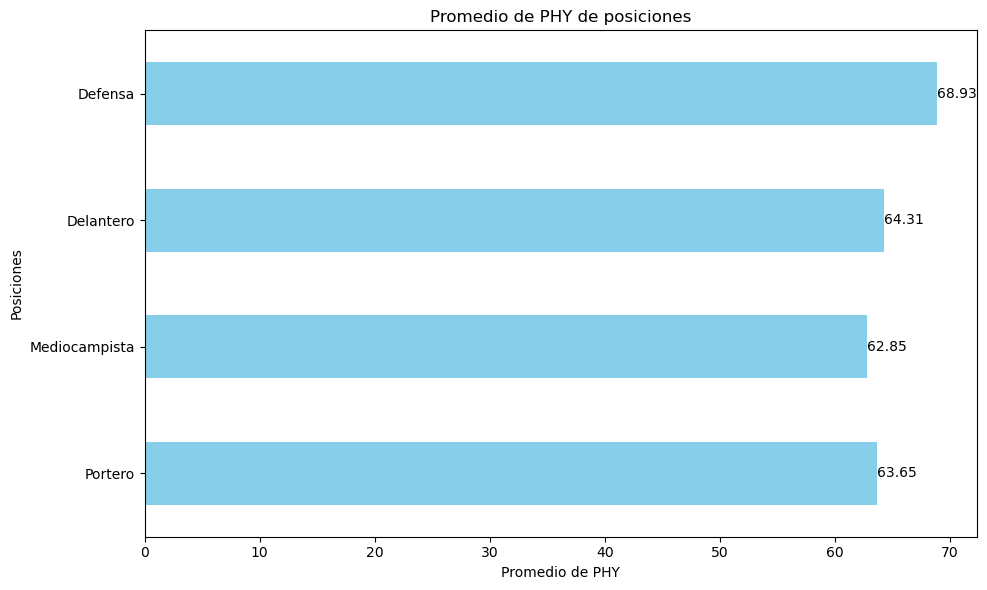

In [118]:
# Gráfico de barras
plt.figure(figsize=(10, 6))
bars = promedio_phy.plot(kind='barh', color='skyblue')
plt.title('Promedio de PHY de posiciones')
plt.xlabel('Promedio de PHY')
plt.ylabel('Posiciones')
plt.gca().invert_yaxis()

# Coloco las etiquetas de datos en cada una de las barras
for index, value in enumerate(promedio_phy):
    plt.text(value, index, f'{value:.2f}', va='center')
    
# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Conclusiones

- Gracias al Top 5 de jugadores según su posición, se pueden realizar múltiples variantes para un "equipo ideal", combinando jugadores de élite de distintas nacionalidades y equipos con la mejor clasifiación.
- Viendo a los equipos con el mayor promedio de OVR (Valoración) en sus jugadores, podemos afirmar que los equipos más valorados pertenecen al continente europeo, por lo que podemos confirmar que la competitividad en las ligas europeas son elevadas y los jugadores siempre están evolucionando.
- El tercer gráfico nos muestra que la posición donde más se requiere de un PHY (Físico) elevado es la defensa, seguido por los delanteros y porteros, como último están los mediocampistas.